<a href="https://colab.research.google.com/github/CeroSahin/Linear_Regression/blob/main/linear_reg_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df_data = pd.read_csv("adm_data.csv")

In [ ]:
df_data.shape

(400, 9)

In [ ]:
df_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df_data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
x = torch.tensor(df_data[["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR ", "CGPA", "Research"]].values)

In [ ]:
x = torch.tensor(df_data[["TOEFL Score", "University Rating"]].values).double()

In [ ]:
# # z-score normalization

means = x.mean(dim=0)
std_vals = torch.std(x, dim=0)
x = (x - means) /std_vals

In [ ]:
y = torch.tensor(df_data["Chance of Admit "])

In [ ]:
def f(x, w, b:int):
  return torch.matmul(x, w) + b

In [ ]:
b = 0
w = torch.zeros(x.size()[1]).double()
yhat = f(x, w, b)

## Some Examples to Figure This Out

In [ ]:
a = torch.tensor([[10, 6], [5, 3], [2, 7]]) # x values
v = torch.tensor([2,1]) # weights
chat = a @ v
c = torch.tensor([30, 15, 9])

In [ ]:
a.T

tensor([[10,  5,  2],
        [ 6,  3,  7]])

In [ ]:
chat - c

tensor([-4, -2,  2])

In [ ]:
d = torch.tensor([3,5,7])
e = torch.tensor([[2,4,7], [3,5,8]])
e @ d

tensor([75, 90])

In [ ]:
((chat -  c) * a.T[0]).float().mean()

tensor(-15.3333)

In [ ]:
x

tensor([[337.0000, 118.0000,   4.0000,  ...,   4.5000,   9.6500,   1.0000],
        [324.0000, 107.0000,   4.0000,  ...,   4.5000,   8.8700,   1.0000],
        [316.0000, 104.0000,   3.0000,  ...,   3.5000,   8.0000,   1.0000],
        ...,
        [330.0000, 116.0000,   4.0000,  ...,   4.5000,   9.4500,   1.0000],
        [312.0000, 103.0000,   3.0000,  ...,   4.0000,   8.7800,   0.0000],
        [333.0000, 117.0000,   4.0000,  ...,   4.0000,   9.6600,   1.0000]],
       dtype=torch.float64)

In [ ]:
yhat

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

## Back to  the Real World

In [ ]:
# yhat = f(x, w, b)
# x -> (400, 7)
# y -> 400
# yhat -> 400
def calc_w_grad(yhat, y, x):
  # returns gradients for every w.
  grad = torch.tensor([(((yhat - y) @ x.T[index]).mean()).tolist() for index in range(x.size()[1])])
  return grad

In [ ]:
calc_w_grad(yhat, y, x)

tensor([-45.0426, -40.4709])

In [ ]:
def calc_b_grad(yhat, y):
  return (2 * (yhat - y).mean()).item()

In [ ]:
calc_b_grad(yhat, y)

-1.4487

In [ ]:
def calc_mse_loss(yhat, y):
  return torch.pow(yhat - y, 2).mean()

In [ ]:
b

0

In [ ]:
b = 0
w = torch.zeros(x.size()[1]).double()
lr = 0.000001
current_loss = 0
for i in range(10000):
  yhat = f(x, w, b)
  wgrad = calc_w_grad(yhat, y, x)
  bgrad = calc_b_grad(yhat, y)
  w = w - lr * wgrad
  b = b - lr * bgrad
  loss = round(calc_mse_loss(yhat, y).item(), 8)
  print(loss)
  if loss == current_loss:
    print(i)
    break
  else:
    current_loss = loss


Streaming output truncated to the last 5000 lines.
0.51853422
0.51853212
0.51853002
0.51852791
0.51852581
0.51852371
0.51852161
0.51851951
0.5185174
0.5185153
0.5185132
0.5185111
0.518509
0.5185069
0.51850479
0.51850269
0.51850059
0.51849849
0.51849639
0.51849428
0.51849218
0.51849008
0.51848798
0.51848588
0.51848378
0.51848168
0.51847957
0.51847747
0.51847537
0.51847327
0.51847117
0.51846907
0.51846697
0.51846486
0.51846276
0.51846066
0.51845856
0.51845646
0.51845436
0.51845226
0.51845015
0.51844805
0.51844595
0.51844385
0.51844175
0.51843965
0.51843755
0.51843545
0.51843334
0.51843124
0.51842914
0.51842704
0.51842494
0.51842284
0.51842074
0.51841864
0.51841654
0.51841444
0.51841233
0.51841023
0.51840813
0.51840603
0.51840393
0.51840183
0.51839973
0.51839763
0.51839553
0.51839343
0.51839133
0.51838923
0.51838712
0.51838502
0.51838292
0.51838082
0.51837872
0.51837662
0.51837452
0.51837242
0.51837032
0.51836822
0.51836612
0.51836402
0.51836192
0.51835982
0.51835772
0.51835562
0.51835352

In [ ]:
calc_mse_loss(f(x, w, b), y)

tensor(0.5082, dtype=torch.float64)

In [ ]:
def visualize(X, y, w, b):
    w1, w2 = w[0], w[1]
    w1, w2 = w1.view(1), w2.view(1)

    surface_x = torch.arange(0, 1, 0.01).view(-1, 1).repeat(1, 100)
    surface_y = torch.arange(0, 1, 0.01).view(1, -1).repeat(100, 1)
    surface_z = surface_x * w1 + surface_y * w2 + b

    fig = plt.figure()
    ax = fig.add_subplot(projection="3d")
    ax.scatter(X[:, 0], X[:, 1], y)
    ax.plot_surface(surface_x, surface_y, surface_z, color="red", alpha=0.5)
    plt.show()

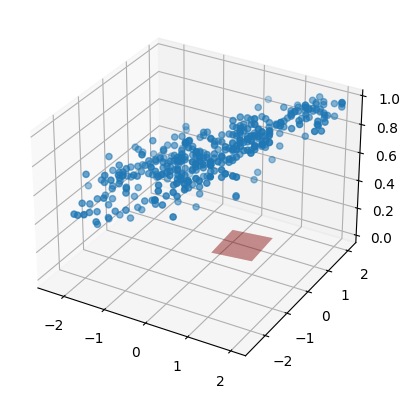

In [ ]:
visualize(x, y, w, b)

## Doing this with nn.Module

In [ ]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torch

In [ ]:
class MyLinearModel(nn.Module):
  def __init__(self):
    super(MyLinearModel, self).__init__()
    self.linear = nn.Linear(in_features=7, out_features=1)

    def forward(self, x):
      return self.linear(x)

In [ ]:
model = MyLinearModel()

In [ ]:
model.parameters() # this is the weights + bias.

<generator object Module.parameters at 0x7f4b7edd0580>

In [ ]:
loss_fn = nn.MSELoss()

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.0001)

In [ ]:
for i in range(5000):
  yhat = model.forward(x).view(-1)
  loss = loss_fn(yhat, y)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()


NotImplementedError: ignored